In [132]:
CO = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_CO.csv')
CO['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')


# For All time processing

In [133]:
def auto(df):
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour

    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    
    return df

In [134]:
# plt.figure(figsize=(20,5))
# CO_non.plot(marker='o')
CO = auto(CO)
NO2 = auto(NO2)
PM10 = auto(PM10)
PM25 = auto(PM25)

In [98]:
# plt.figure(figsize=(20,5))
# CO_non.plot(marker='o')

In [136]:
# import seaborn as sns
# figure, (ax1) = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18,10)
# sns.lineplot(data=CO, ax = ax1, ci=None)
# plt.ylim((0,1))

CO

,Gwang-bok,Jeon-po,On-cheon,Hak-Jang
time-year,,,,
2014,0.6,0.4,1.1,0.4
2014,0.6,0.4,0.9,0.4
2014,0.5,0.4,0.8,0.4
2014,0.5,0.4,0.8,0.4
2014,0.5,0.4,0.8,0.4
...,...,...,...,...
2020,0.5,0.5,0.5,0.4
2020,0.5,0.5,0.5,0.4
2020,0.5,0.4,0.5,0.4


# 함수화

In [ ]:

def auto(df):
    CO["time-year"] = CO["time"].dt.year
    CO["time-month"] = CO["time"].dt.month
    CO["time-day"] = CO["time"].dt.day
    CO["time-hour"] = CO["time"].dt.hour

#     CO_non= (CO['time-hour']<=23) & (CO['time-hour']>=5)
#     CO_op= (CO['time-hour']>=0) & (CO['time-hour']<5)
#     CO_non = CO.loc[CO_non]
#     CO_op = CO.loc[CO_op]

    CO_non['Gwang-bok'] = CO_non['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    CO_non['On-cheon'] = CO_non['On-cheon'].apply(pd.to_numeric, errors='coerce')
    CO_non['Jeon-po'] = CO_non['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    CO_non['Hak-Jang'] = CO_non['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    CO_non = CO_non[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    CO_non.set_index('time-year', inplace = True)

In [103]:
def auto(df):
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour

    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    
    return df

In [104]:
NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')
NO2

,년,월,일,시,Gwang-bok,On-cheon,Jeon-po,Hak-Jang,time
0,2014,1,1,1,0.023,0.015,0.016,0.015,2014-01-01 01:00:00
1,2014,1,1,2,0.023,0.014,0.015,0.015,2014-01-01 02:00:00
2,2014,1,1,3,0.017,0.012,0.016,0.008,2014-01-01 03:00:00
3,2014,1,1,4,0.018,0.012,0.016,0.008,2014-01-01 04:00:00
4,2014,1,1,5,0.019,0.011,0.017,0.013,2014-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
53323,2020,1,31,20,0.032,0.04,0.048,0.068,2020-01-31 20:00:00
53324,2020,1,31,21,0.033,0.034,0.046,0.03,2020-01-31 21:00:00
53325,2020,1,31,22,0.033,0.034,0.039,0.034,2020-01-31 22:00:00
53326,2020,1,31,23,0.03,0.038,0.041,0.033,2020-01-31 23:00:00


In [107]:
NO2 = auto(NO2)
NO2

,Gwang-bok,Jeon-po,On-cheon,Hak-Jang
time-year,,,,
2014,0.023,0.016,0.015,0.015
2014,0.023,0.015,0.014,0.015
2014,0.017,0.016,0.012,0.008
2014,0.018,0.016,0.012,0.008
2014,0.019,0.017,0.011,0.013
...,...,...,...,...
2020,0.032,0.048,0.040,0.068
2020,0.033,0.046,0.034,0.030
2020,0.033,0.039,0.034,0.034


(0, 0.05)

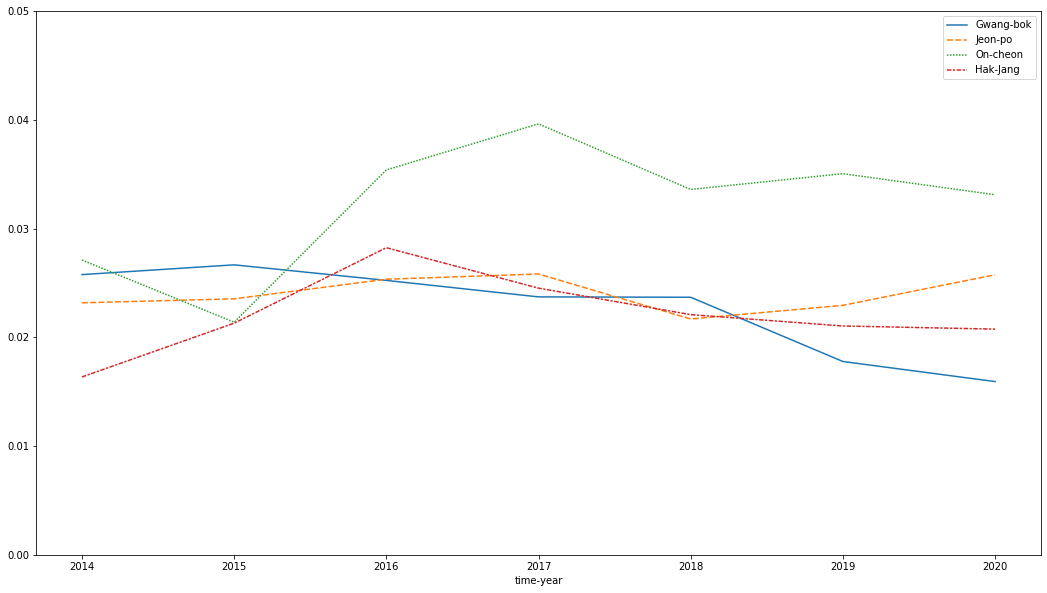

In [109]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=NO2, ax = ax1, ci=None)
plt.ylim((0,0.05))

In [119]:
def auto(df):
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour

    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    figure, (ax1) = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(18,10)
#     sns.lineplot(data=df, ax = ax1, ci=None)
#     plt.ylim((0,0.05))
    return  sns.lineplot(data=df, ax = ax1, ci=None, marker='o')

In [120]:
PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')
PM25

,년,월,일,시,Gwang-bok,On-cheon,Jeon-po,Hak-Jang,time
0,2014,1,1,1,NaN,NaN,NaN,NaN,2014-01-01 01:00:00
1,2014,1,1,2,NaN,NaN,NaN,NaN,2014-01-01 02:00:00
2,2014,1,1,3,NaN,NaN,NaN,NaN,2014-01-01 03:00:00
3,2014,1,1,4,NaN,NaN,NaN,NaN,2014-01-01 04:00:00
4,2014,1,1,5,NaN,NaN,NaN,NaN,2014-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
53323,2020,1,31,20,19,26,27,27,2020-01-31 20:00:00
53324,2020,1,31,21,25,27,26,29,2020-01-31 21:00:00
53325,2020,1,31,22,23,26,25,30,2020-01-31 22:00:00
53326,2020,1,31,23,19,26,23,31,2020-01-31 23:00:00


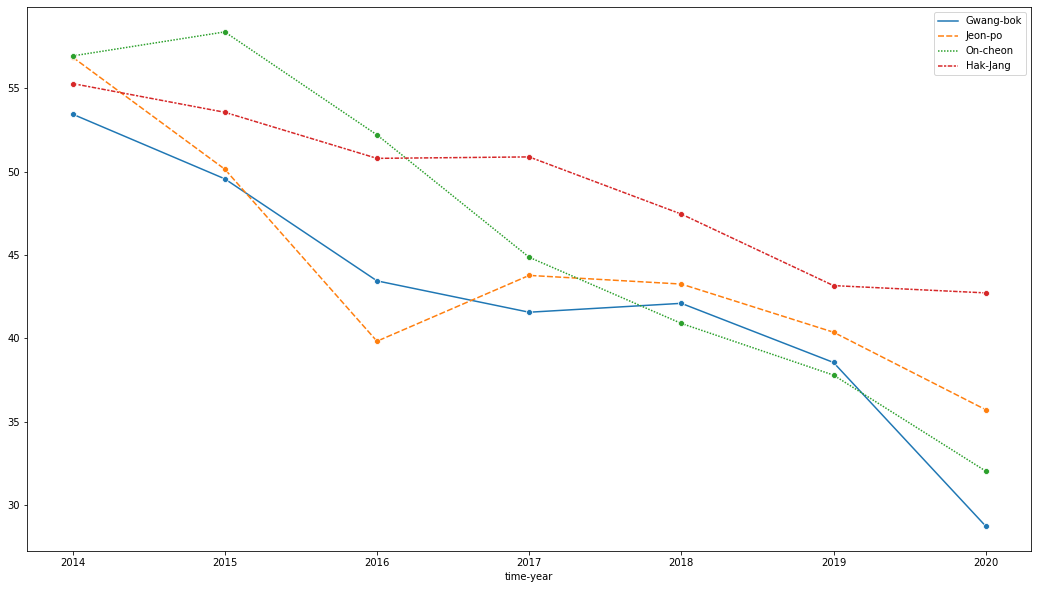

In [121]:
auto(PM10)

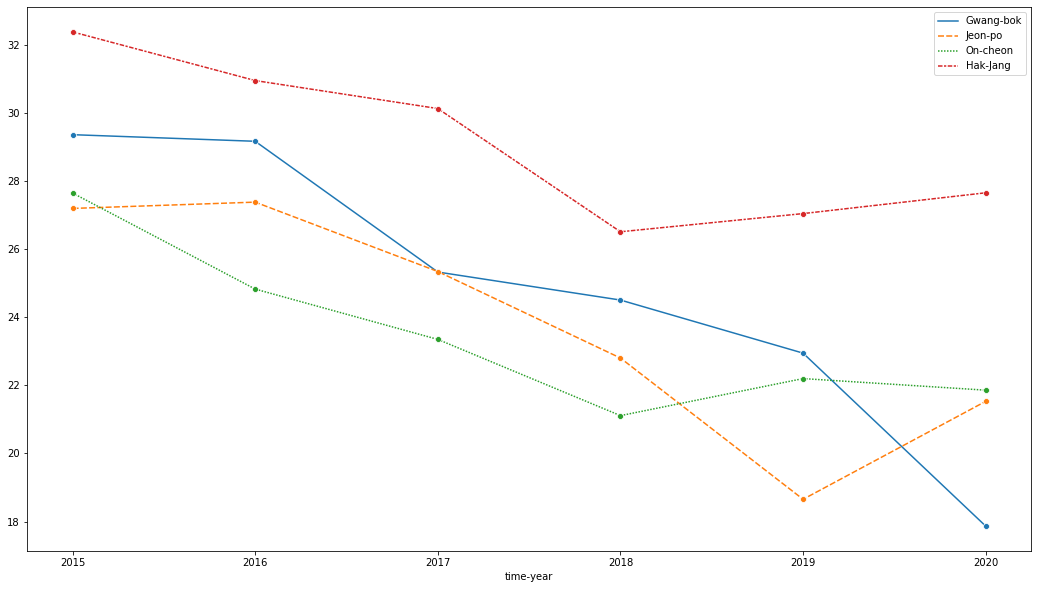

In [122]:
auto(PM25)